In [2]:
import pandas as pd
from faker import Faker
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('./dataset/dataset_gabungan.csv')
data

# Get number of rows needed
row_count = len(data)

In [ ]:
# dataset generation from faker
fake = Faker()
user_profile = [fake.profile() for i in range(row_count)]
user_profile = pd.DataFrame(user_profile)
user_profile

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,"Accountant, chartered public finance",Grimes Ltd,024-72-1318,"2890 Martin Terrace\nDavidside, PR 07197","(12.3037965, -72.822134)",A-,"[https://www.paul-bowen.com/, http://scott.com...",alishathompson,Robert Kirby,M,USS Washington\nFPO AE 04370,rhonda18@yahoo.com,1953-11-11
1,Geoscientist,Fisher-Gordon,793-93-4348,"100 Alicia Expressway\nSouth Davidmouth, WI 02153","(-7.863246, 11.153065)",O+,"[https://www.hall-ramos.com/, http://vazquez.c...",otran,William Flores,M,"745 Andrea River Suite 052\nCoffeyfurt, ID 48839",jeffreyshepherd@gmail.com,1918-04-15
2,Higher education lecturer,Simmons LLC,838-60-6471,Unit 7039 Box 7752\nDPO AE 88191,"(64.948752, 75.088249)",B+,"[http://www.olson.com/, http://www.duran.biz/,...",jamesbarnes,Gregory Harris,M,"64615 Watkins Islands Suite 641\nTrevorbury, P...",erinlam@gmail.com,1938-01-09
3,Charity fundraiser,Shaw LLC,098-99-0288,"1528 Jessica Gardens Apt. 862\nSanchezfort, UT...","(-41.987453, 41.940964)",A+,"[https://www.dalton-love.com/, http://avila.co...",eric67,Charles Higgins,M,"85511 Arnold Stream Suite 890\nCarrton, AR 85360",meganlopez@gmail.com,1937-01-03
4,Aeronautical engineer,Miller LLC,841-76-5025,"77457 Keith Ferry\nPort Betty, TX 21957","(-11.4506095, -170.850352)",A+,"[http://montgomery.info/, http://www.burns-you...",danielchristine,Veronica Cox,F,"95614 Joanna Locks Suite 971\nHansontown, VI 5...",sandrabowen@hotmail.com,1931-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Sales executive,Reyes-Mclean,372-70-1671,"4081 Chen Cliff\nNorth Jacobland, VT 08738","(23.0493075, -117.269031)",B+,[http://wong.info/],williamsjessica,Gregory Friedman,M,"62231 Richards Ferry Apt. 859\nLake Autumn, WY...",courtney96@hotmail.com,1937-09-17
315,"Designer, jewellery","Cruz, Aguilar and Weaver",602-65-8362,"6399 Melissa Extensions\nPattonland, MH 06448","(-85.3165855, -154.578946)",B+,"[http://taylor.com/, https://torres.biz/, http...",lopezmaria,Christina Pittman,F,"89474 Billy Plaza\nNew Andreaton, WI 03972",mary26@gmail.com,1949-09-26
316,Local government officer,Delgado-May,360-40-5356,"602 Payne Hollow Suite 849\nSmithhaven, NJ 50477","(25.2480635, 16.117201)",B+,[https://williams-silva.info/],russellking,Karen Castillo,F,"39953 Mcneil Land\nDanielshire, MA 85594",neil79@yahoo.com,1984-05-31
317,"Surveyor, insurance","Anderson, Smith and Le",471-27-1034,"1268 Nicole Estates\nCarlafort, LA 90121","(38.396829, 9.301473)",B-,[http://jackson.com/],perezyesenia,Jacob Miles,M,"08884 Dean Field Suite 060\nWest Jesusfurt, PA...",edwardskimberly@yahoo.com,1976-07-19


In [ ]:
# drop column job, company, ssn, residence, current_location, website, birthdate
user_profile = user_profile.drop(columns=[
                                 'job', 'company', 'ssn', 'residence', 'current_location', 'website', 'birthdate'])
user_profile

,blood_group,username,name,sex,address,mail
0,A-,alishathompson,Robert Kirby,M,USS Washington\nFPO AE 04370,rhonda18@yahoo.com
1,O+,otran,William Flores,M,"745 Andrea River Suite 052\nCoffeyfurt, ID 48839",jeffreyshepherd@gmail.com
2,B+,jamesbarnes,Gregory Harris,M,"64615 Watkins Islands Suite 641\nTrevorbury, P...",erinlam@gmail.com
3,A+,eric67,Charles Higgins,M,"85511 Arnold Stream Suite 890\nCarrton, AR 85360",meganlopez@gmail.com
4,A+,danielchristine,Veronica Cox,F,"95614 Joanna Locks Suite 971\nHansontown, VI 5...",sandrabowen@hotmail.com
...,...,...,...,...,...,...
314,B+,williamsjessica,Gregory Friedman,M,"62231 Richards Ferry Apt. 859\nLake Autumn, WY...",courtney96@hotmail.com
315,B+,lopezmaria,Christina Pittman,F,"89474 Billy Plaza\nNew Andreaton, WI 03972",mary26@gmail.com
316,B+,russellking,Karen Castillo,F,"39953 Mcneil Land\nDanielshire, MA 85594",neil79@yahoo.com
317,B-,perezyesenia,Jacob Miles,M,"08884 Dean Field Suite 060\nWest Jesusfurt, PA...",edwardskimberly@yahoo.com


In [ ]:
# generate height weight data
generateProfile = Faker()

Faker.seed(10)


def calculate_calories(weight, height, gender, age):

    # Harris-Benedict equation for BMR (Basal Metabolic Rate)
    if gender == 'Male':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        bmr = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    # Multiply by activity factor (using moderate activity 1.55)
    return int(bmr * 1.55)


# Create synthetic data for HeightWeight sheet

synthetic_data = []


for i in range(1000):
    gender = generateProfile.random_element(['Male', 'Female'])
    age = generateProfile.random_int(18, 65)

    # Generate height and weight based on gender (adjusted for Indonesian averages)
    if gender == 'Male':


        # Indonesian male averages: 160-175cm
        height = generateProfile.random_int(158, 178)
        # Calculate weight based on BMI range 18.5-25
        min_weight = int((18.5 * (height/100) ** 2))
        max_weight = int((25 * (height/100) ** 2))
        weight = generateProfile.random_int(min_weight, max_weight)
    else:

        # Indonesian female averages: 148-163cm
        height = generateProfile.random_int(148, 165)
        # Calculate weight based on BMI range 18.5-25
        min_weight = int((18.5 * (height/100) ** 2))
        max_weight = int((25 * (height/100) ** 2))
        weight = generateProfile.random_int(min_weight, max_weight)

    # Calculate calories based on characteristics
    cal_need = calculate_calories(weight, height, gender, age)

    user_id = generateProfile.uuid4()

    synthetic_data.append([gender, weight, height, cal_need, user_id])

# Create DataFrame

height_weight_df = pd.DataFrame(synthetic_data, columns=[
                                'Sex', 'Body_Weight', 'Body_Height', 'Cal_Need', 'User_ID'])

# Display sample of the data
print(height_weight_df.info())

print("\nSummary statistics:")
print(height_weight_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          1000 non-null   object
 1   Body_Weight  1000 non-null   int64 
 2   Body_Height  1000 non-null   int64 
 3   Cal_Need     1000 non-null   int64 
 4   User_ID      1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None

Summary statistics:
       Body_Weight  Body_Height     Cal_Need
count  1000.000000  1000.000000  1000.000000
mean     57.271000   162.782000  2114.191000
std       7.831021     8.133673   264.340883
min      40.000000   148.000000  1603.000000
25%      52.000000   157.000000  1915.000000
50%      57.000000   163.000000  2069.000000
75%      63.000000   169.000000  2306.000000
max      79.000000   178.000000  2907.000000


In [ ]:
# save height_weight_df to csv
height_weight_df.to_csv('./dataset/height_weight.csv', index=False)

Jumlah data dari age: 319


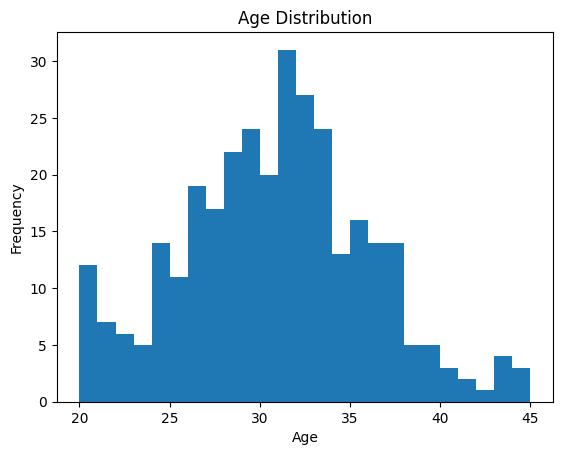

In [ ]:
# generate data for age
np.random.seed(seed=10)


randomNums = np.random.normal(loc=30, scale=5.5, size=row_count)
randomNums = np.clip(randomNums, 20, 50)

Age = np.round(randomNums).astype('int64')

print(F'Jumlah data dari age: {len(Age)}')


axis = np.arange(start=min(Age), stop=max(Age) + 1)
plt.hist(Age, bins=axis)
plt.xlabel('Age')

plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
# merge age data to user_profile
user_profile['Age'] = Age
user_profile

# save dataset to csv
user_profile.to_csv('./dataset/dataset_user_profile.csv', index=False)

In [ ]:
height_weight_df = pd.read_csv('./dataset/height_weight.csv')
user_profile_df = pd.read_csv('./dataset/dataset_user_profile.csv')

# Convert sex values to consistent format (M/F)
user_profile_df['sex'] = user_profile_df['sex'].map(
    {'M': 'Male', 'F': 'Female'})

# Randomly assign height_weight records to users with matching sex
merged_df = pd.DataFrame()
for sex in ['Male', 'Female']:
    # Get users and height_weight records for current sex
    users = user_profile_df[user_profile_df['sex'] == sex].copy()
    hw_records = height_weight_df[height_weight_df['Sex'] == sex].copy()

    # Check if there are enough height_weight records for the users
    n_users = len(users)
    n_hw_records = len(hw_records)
    if n_hw_records < n_users:
        print(f"Not enough height_weight records for {sex}. Skipping.")
        continue

    # Randomly select height_weight records (without replacement) for each user
    selected_indices = np.random.choice(
        hw_records.index, size=min(n_users, n_hw_records), replace=False)
    hw_selected = hw_records.loc[selected_indices]

    # Reset indices to allow concatenation
    users.reset_index(drop=True, inplace=True)
    hw_selected.reset_index(drop=True, inplace=True)

    # Combine the data
    temp_df = pd.concat([users, hw_selected.drop(
        ['Sex', 'User_ID'], axis=1)], axis=1)
    merged_df = pd.concat([merged_df, temp_df])

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 168
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   blood_group  319 non-null    object
 1   username     319 non-null    object
 2   name         319 non-null    object
 3   sex          319 non-null    object
 4   address      319 non-null    object
 5   mail         319 non-null    object
 6   Age          319 non-null    int64 
 7   Body_Weight  319 non-null    int64 
 8   Body_Height  319 non-null    int64 
 9   Cal_Need     319 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 27.4+ KB


In [ ]:
# Save the merged dataset
merged_df.to_csv('./dataset/user_profile_height_weight.csv', index=False)